<h1 style="text-align:center;color:teal;font-family:calibri;font-size:250%">Regularisation Assignment on Surprise Housing</h1>

### Problem Statement 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

### Business goal

To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Import libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the visualisation libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
#import the ML libraries
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

### Read the Dataset

In [4]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Inspection

#### Get shape,describe and info of the dataset

In [5]:
housing.shape #1460 rows and 81 columns

(1460, 81)

In [6]:
housing.describe() # we can look at the min, max and distribution of the numerical variables

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
housing.info() # we can view the datatype and null values of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Check the percent of missing values

In [8]:
round(housing.isnull().sum()/housing.shape[0]*100,2) # Percentage of null values in each of the columns

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Some columns have high missing values, let's interpret further!!

### Data Cleaning

#### Few categorical columns have NA as a value, which has actual meaning and not null

In [9]:
#Rename the values in columns where NA has some meaningful name
cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for i in cols:
    housing[i].fillna("None",inplace=True)

In [10]:
housing.info() # We can see that columns such as 'Alley', 'BsmtQual', 'BsmtCond' etc., are not actually null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### From the describe function we can see that mean and median have large difference,hence some variables are skewed

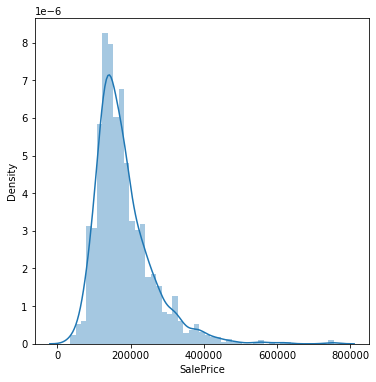

In [11]:
#Checking if the target variable SalePrice is normally distributed
plt.figure(figsize=[6,6])
sns.distplot(housing['SalePrice']);
plt.show()

#### We can see that the Target variable sales price is right skewed

In [12]:
# Checking the Skewness and kurtosis of SalePrice
print("Skewness: ",housing["SalePrice"].skew())
print("Kurtosis: ",housing["SalePrice"].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


#### We can see that target variable has skewness greater 1 and distibution has high density around saleprice of 160000, hence we can do data transformation for this variable

In [13]:
#Log transformation
housing['SalePrice'] = np.log(housing['SalePrice'])

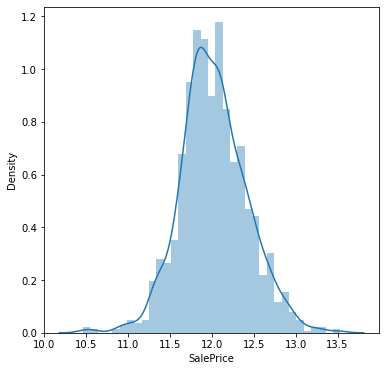

In [14]:
#Checking if the target variable is normally distributed
plt.figure(figsize=[6,6])
sns.distplot(housing['SalePrice']);
plt.show()

In [15]:
# Checking the Skewness and kurtosis of SalePrice
print("Skewness: ",housing["SalePrice"].skew())
print("Kurtosis: ",housing["SalePrice"].kurt())

Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


#### We can now see a normal distribution and Skewness and kurtosis are reduced

#### Before Performing EDA we can remove the ID column and convert 'MSSubClass', 'OverallQual', 'OverallCond' to Object datatypes and LotFrontage,MasVnrArea to Numeric data types

In [16]:
housing.drop("Id",axis=1,inplace=True)

In [17]:
# Converting the categorical columns to object dtype
housing[['MSSubClass', 'OverallQual', 'OverallCond']] = housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [18]:
## Convert two columns to 'numeric' type as mentioned above
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce')

In [19]:
housing.info() # we can see the ID column is dropped and dtype is changed for the other columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

### Exploratory Data Analysis on the Dataset

In [20]:
# List of Categorical Columns
cat_cols = housing.select_dtypes(include='object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
# List of Numerical Columns
num_cols = housing.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Univarient Analysis on Numerical columns

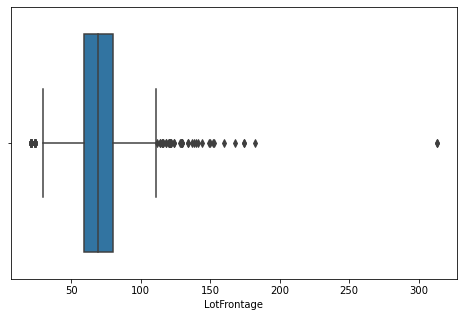

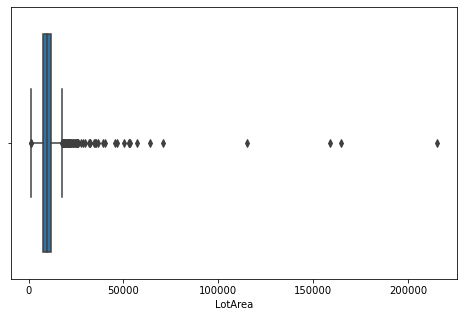

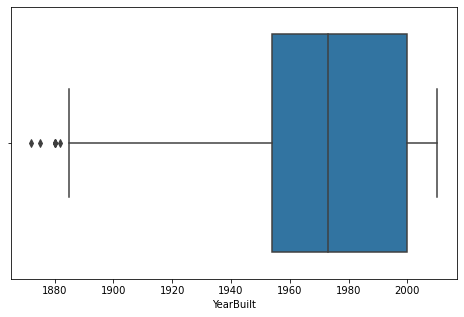

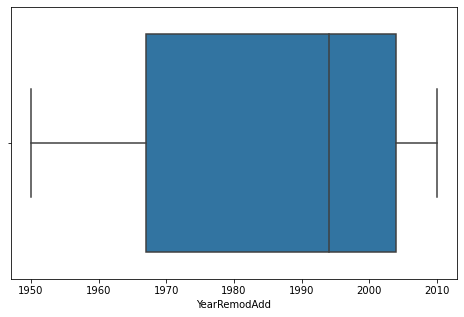

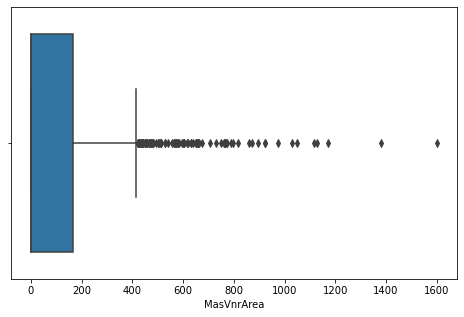

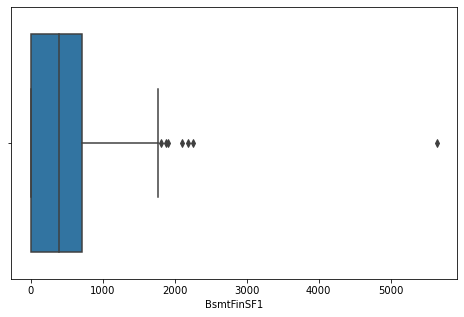

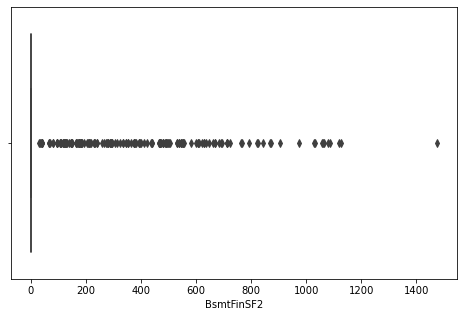

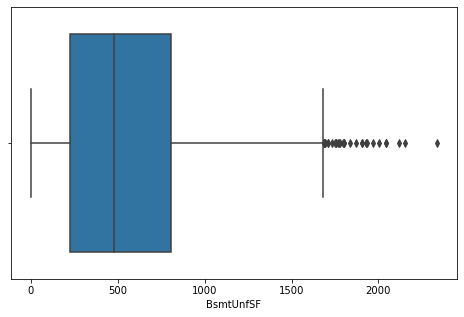

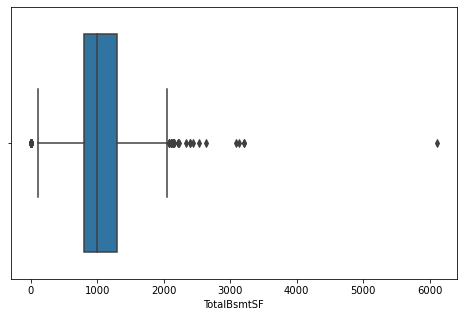

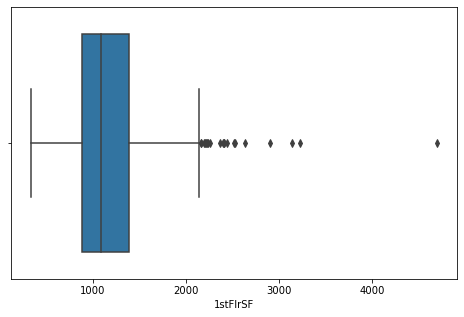

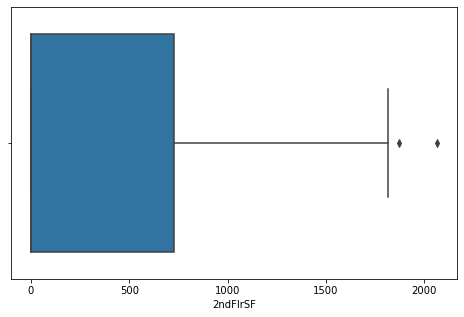

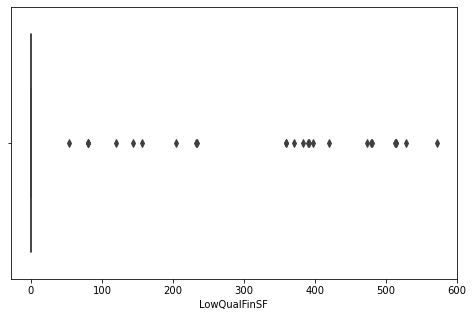

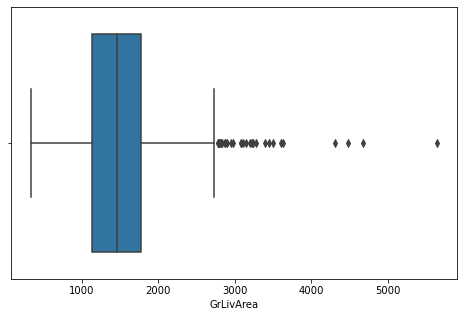

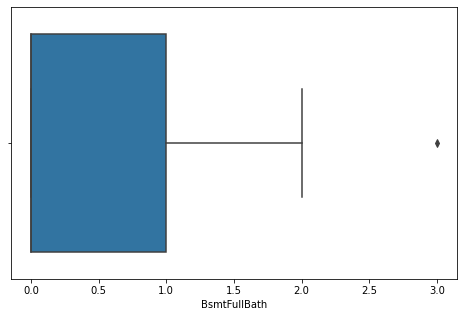

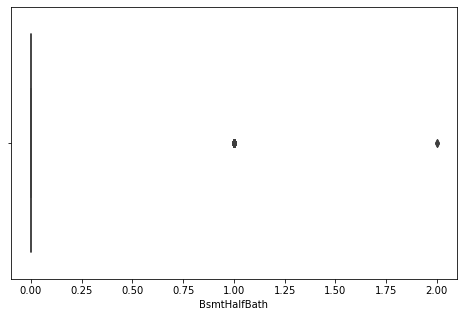

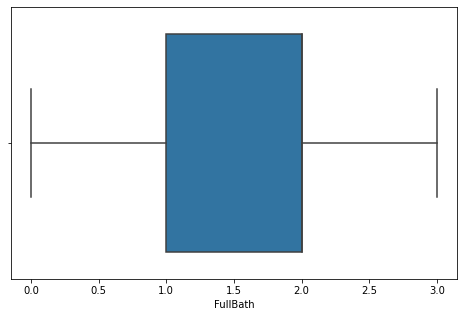

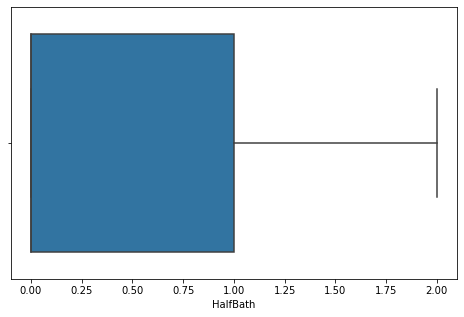

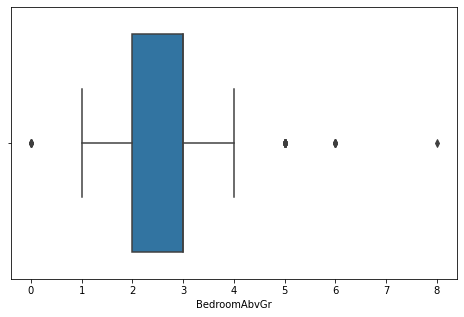

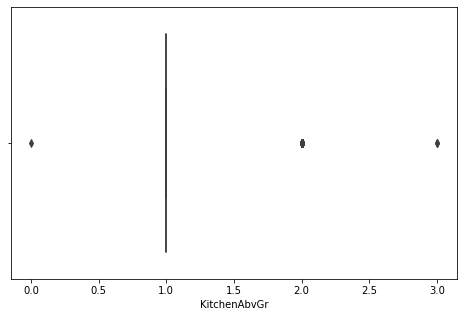

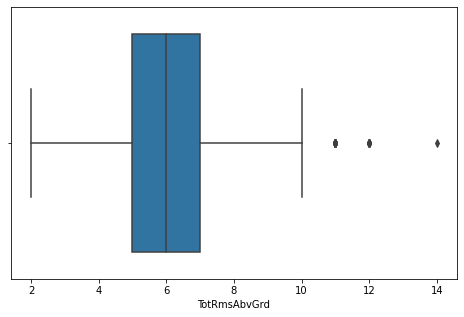

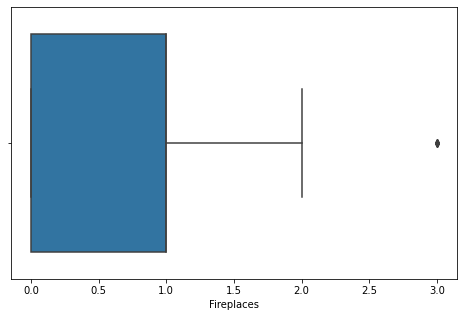

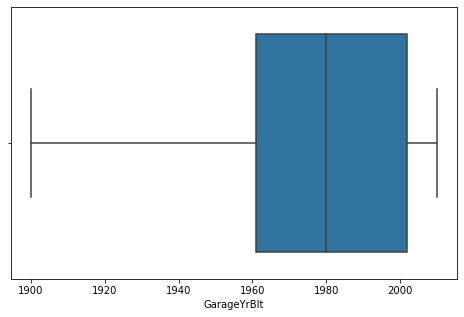

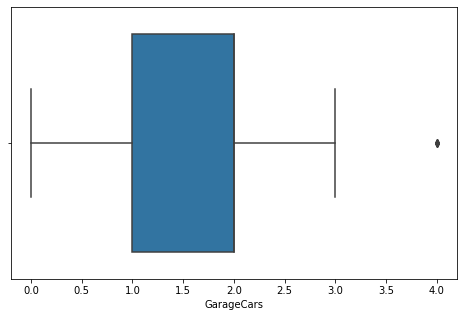

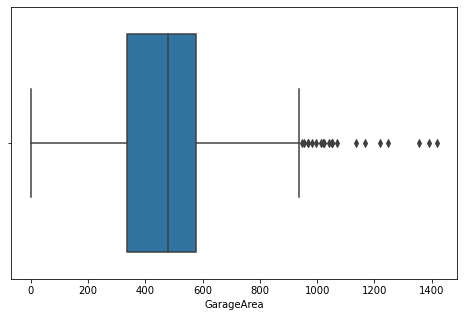

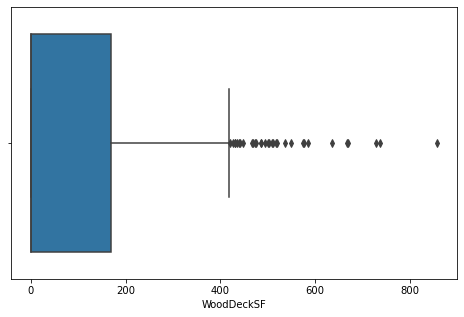

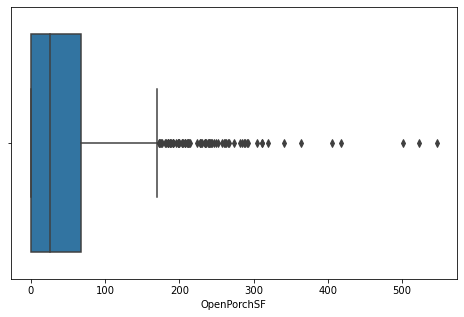

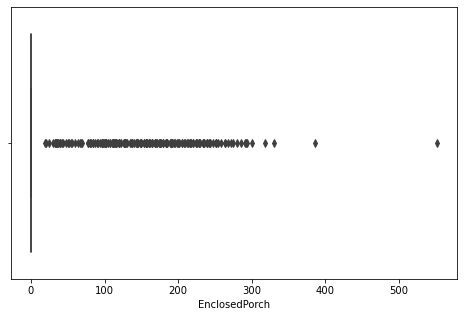

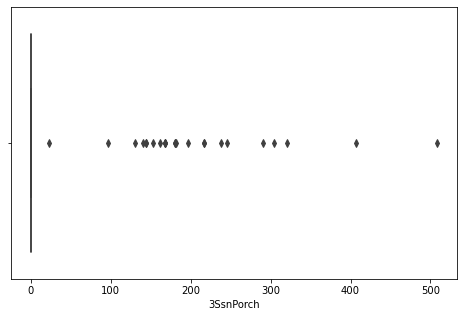

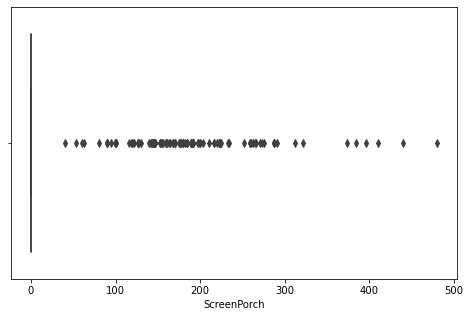

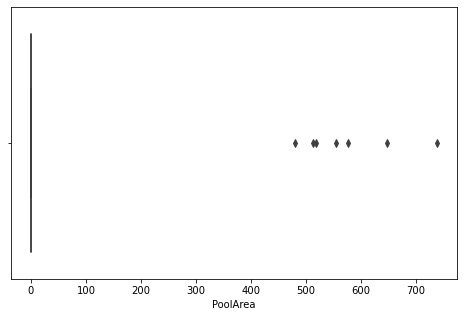

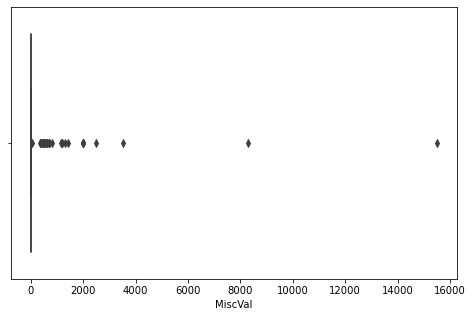

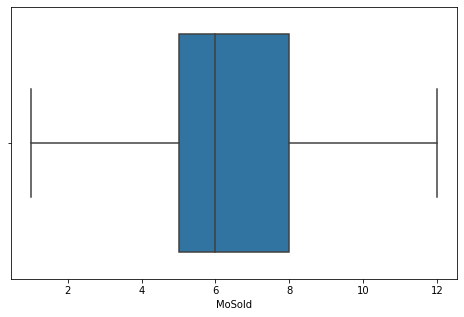

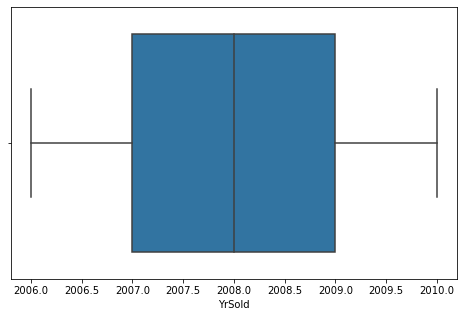

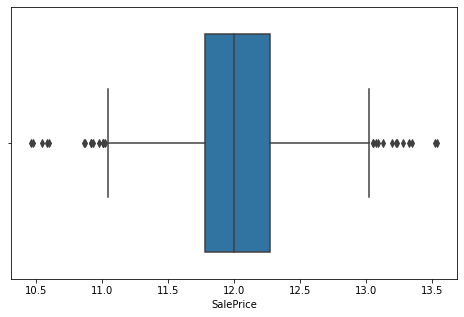

In [22]:
# Plotting box Plots to visulize the distribution and check for any outliers
for i in num_cols:
    plt.figure(figsize=[8,5])
    sns.boxplot(housing[i])
    plt.show()

#### We can see outliers in LotFrontage,LotArea,YearBuilt,MaxVnrArea,BsmtFinSF1,BsmtFinSF2,SalePrice and in other variables

### Univarient Analysis on Categorical columns

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64


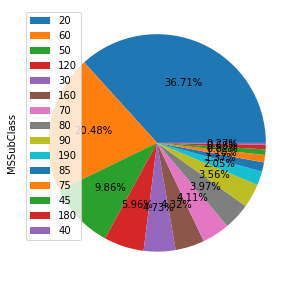

-------------------------------------------------------------------------------
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


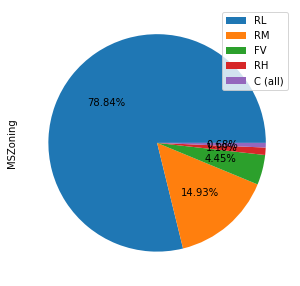

-------------------------------------------------------------------------------
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


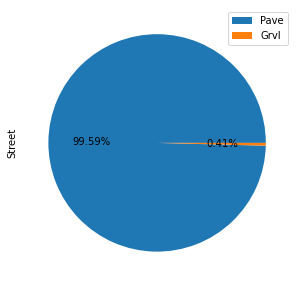

-------------------------------------------------------------------------------
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64


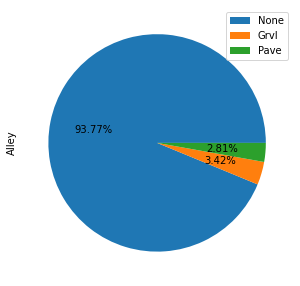

-------------------------------------------------------------------------------
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


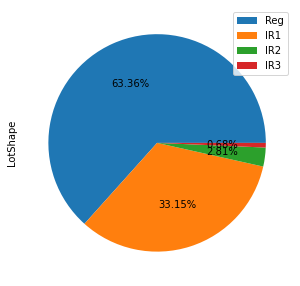

-------------------------------------------------------------------------------
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


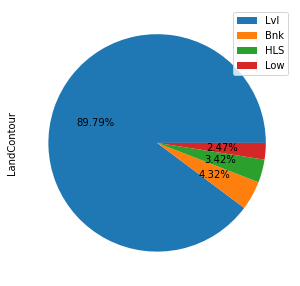

-------------------------------------------------------------------------------
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


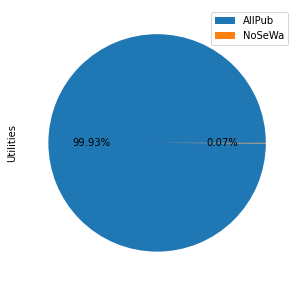

-------------------------------------------------------------------------------
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


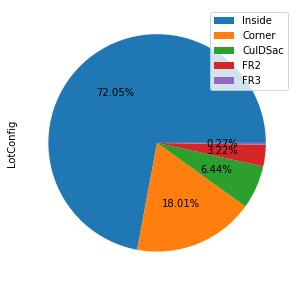

-------------------------------------------------------------------------------
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64


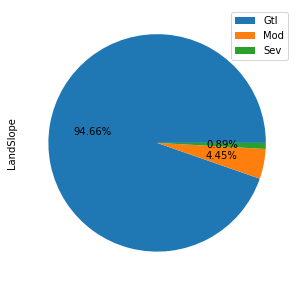

-------------------------------------------------------------------------------
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64


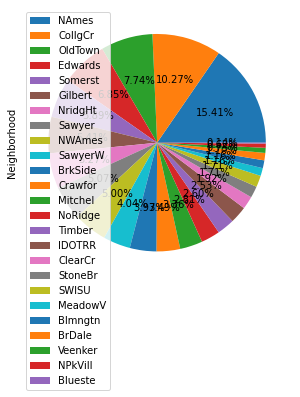

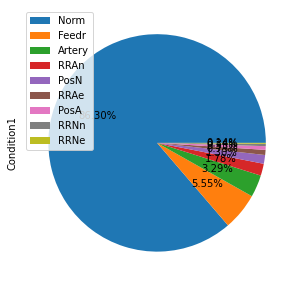

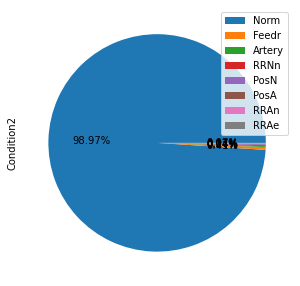

-------------------------------------------------------------------------------
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64
-------------------------------------------------------------------------------
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64
-------------------------------------------------------------------------------
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64


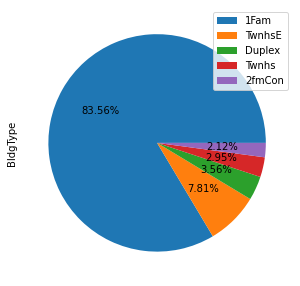

-------------------------------------------------------------------------------
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64


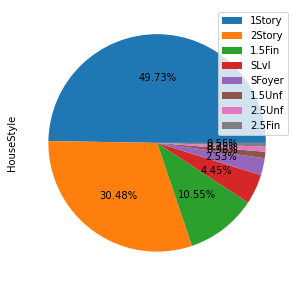

-------------------------------------------------------------------------------
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64


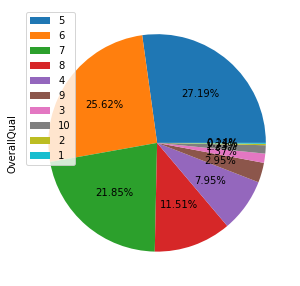

-------------------------------------------------------------------------------
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64


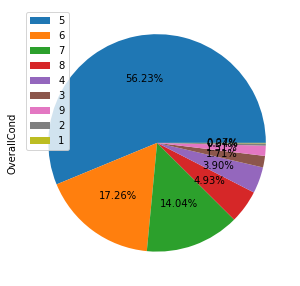

-------------------------------------------------------------------------------
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64


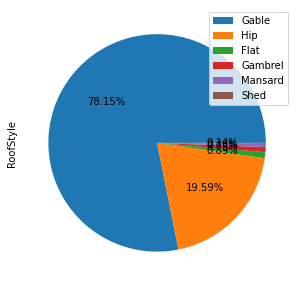

-------------------------------------------------------------------------------
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: RoofMatl, dtype: float64


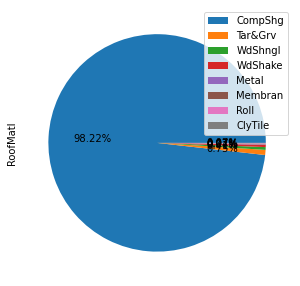

-------------------------------------------------------------------------------
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64


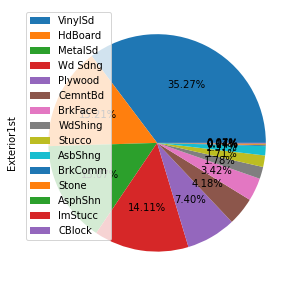

-------------------------------------------------------------------------------
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64


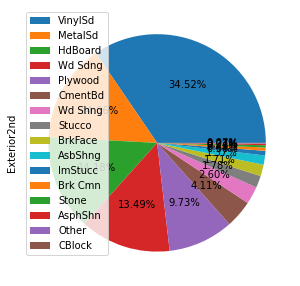

-------------------------------------------------------------------------------
None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64


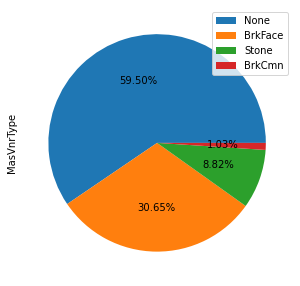

-------------------------------------------------------------------------------
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64


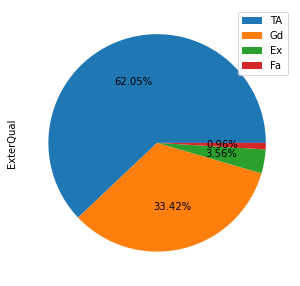

-------------------------------------------------------------------------------
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64


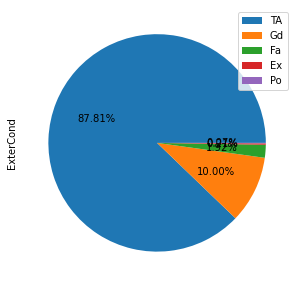

-------------------------------------------------------------------------------
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64


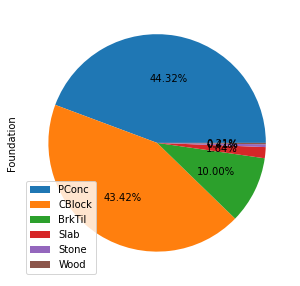

-------------------------------------------------------------------------------
TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: BsmtQual, dtype: float64


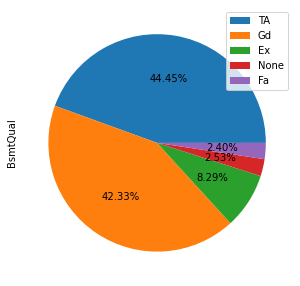

-------------------------------------------------------------------------------
TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: BsmtCond, dtype: float64


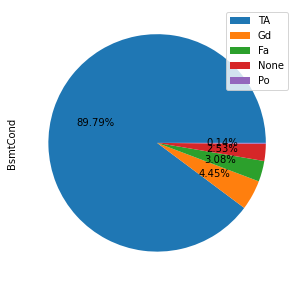

-------------------------------------------------------------------------------
No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: BsmtExposure, dtype: float64


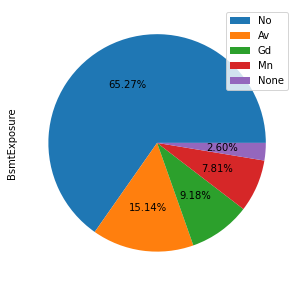

-------------------------------------------------------------------------------
Unf     0.294521
GLQ     0.286301
ALQ     0.150685
BLQ     0.101370
Rec     0.091096
LwQ     0.050685
None    0.025342
Name: BsmtFinType1, dtype: float64


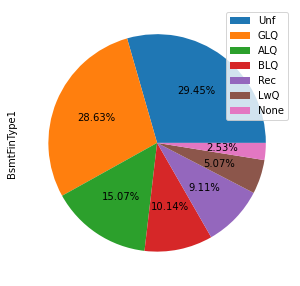

-------------------------------------------------------------------------------
Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: BsmtFinType2, dtype: float64


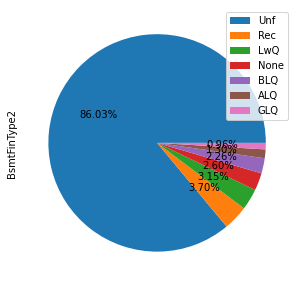

-------------------------------------------------------------------------------
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64


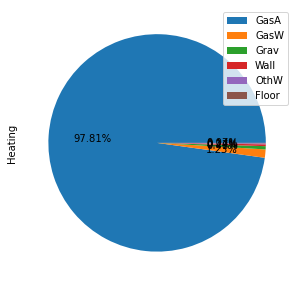

-------------------------------------------------------------------------------
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64


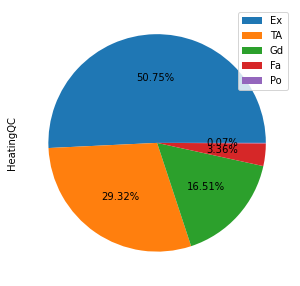

-------------------------------------------------------------------------------
Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64


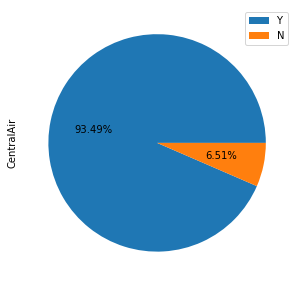

-------------------------------------------------------------------------------
SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64


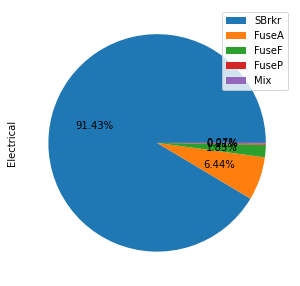

-------------------------------------------------------------------------------
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64


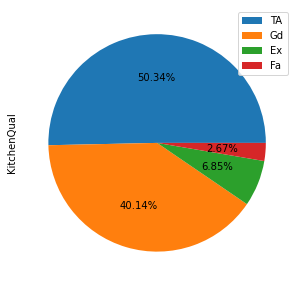

-------------------------------------------------------------------------------
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64


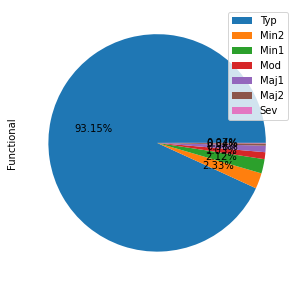

-------------------------------------------------------------------------------
None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: FireplaceQu, dtype: float64


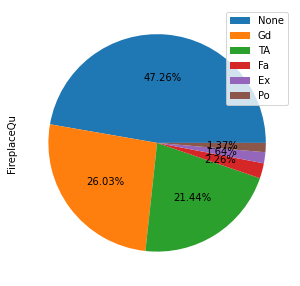

-------------------------------------------------------------------------------
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64


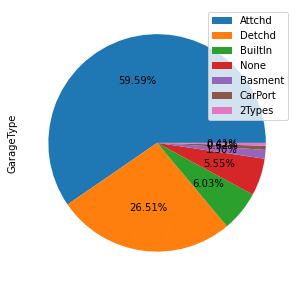

-------------------------------------------------------------------------------
Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: GarageFinish, dtype: float64


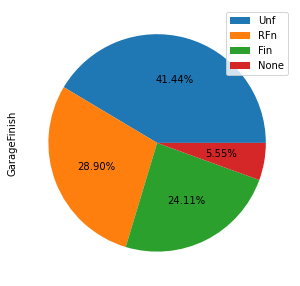

-------------------------------------------------------------------------------
TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: GarageQual, dtype: float64


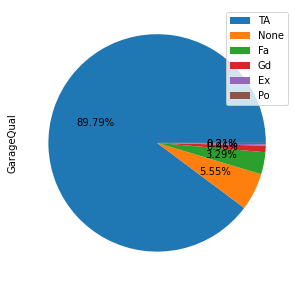

-------------------------------------------------------------------------------
TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: GarageCond, dtype: float64


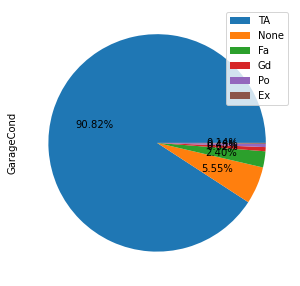

-------------------------------------------------------------------------------
Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64


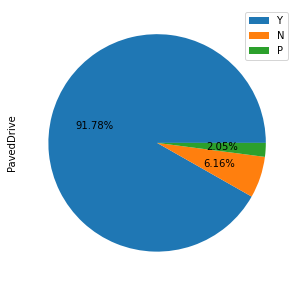

-------------------------------------------------------------------------------
None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: PoolQC, dtype: float64


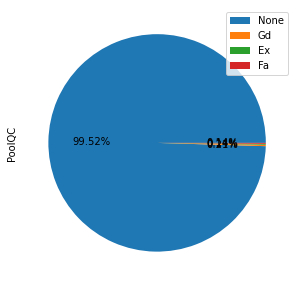

-------------------------------------------------------------------------------
None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64


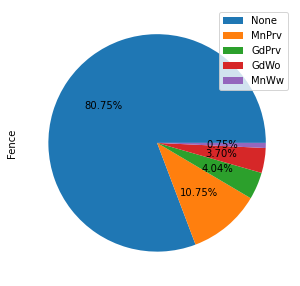

-------------------------------------------------------------------------------
None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64


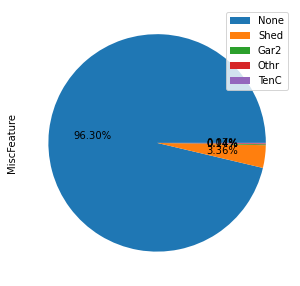

-------------------------------------------------------------------------------
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64


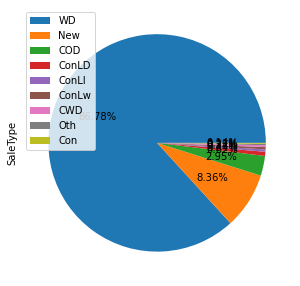

-------------------------------------------------------------------------------
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64


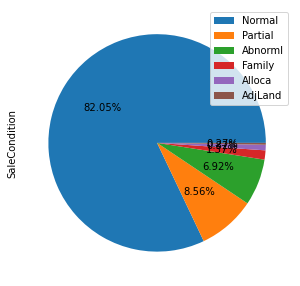

-------------------------------------------------------------------------------


In [23]:
# Plotting pie Plots to visulize the values distribution in each category
for col in cat_cols:
    print(housing[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    housing[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()
    print("-------------------------------------------------------------------------------")

#### We can look Percentage of values in category of columns and infer that MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,RoofStyle etc., columns have more than 70% of distribution in a single category

### Bivarient / Multivarient Analysis on the dataset

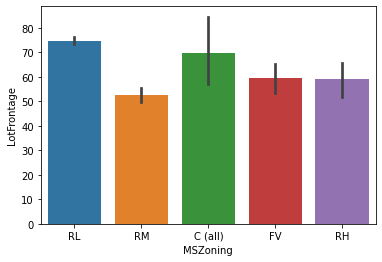

In [24]:
# Plot of MSZoning VS LotFrontage
sns.barplot(x='MSZoning',y='LotFrontage',data=housing)
plt.show()

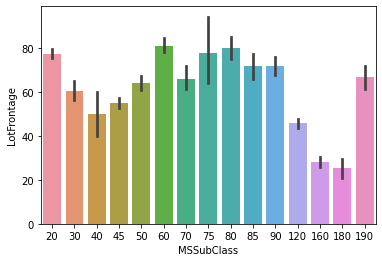

In [25]:
# Plot of MSSubClass VS LotFrontage
sns.barplot(x='MSSubClass',y='LotFrontage',data=housing)
plt.show()

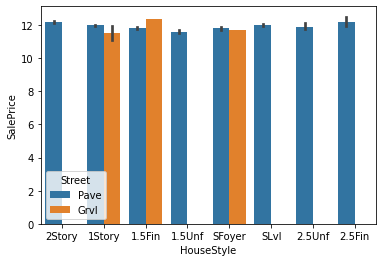

In [26]:
# Plot of HouseStyle VS SalePrice based on Street
sns.barplot(x='HouseStyle',y='SalePrice',hue='Street',data=housing)
plt.show()

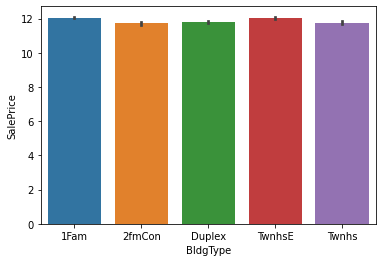

In [27]:
# Plot of BldgType VS SalePrice based
sns.barplot(x='BldgType',y='SalePrice',data=housing)
plt.show()

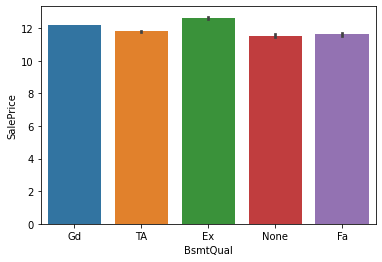

In [28]:
# Plot of BsmtQual VS SalePrice based on Street
sns.barplot(x='BsmtQual',y='SalePrice',data=housing)
plt.show()

### Conclusion :

- We can see that RL(Residential Low Density) has the highest lot frontage and RM(Residential Medium Density) has the least
- We can see that 2-STORY 1946 & NEWER has the highest lot frontage and PUD - MULTILEVEL - INCL SPLIT LEV/FOYER has the least
- The SalePrice is not showing much variance with respect to the Style of dwelling(one story/two story) 
- The SalePrice is almost same for all the Building Types(Type of dwelling) and the basement quality, so there is no significant pattern

#### We can calculate the age of the property based on the difference between year sold and year built

In [29]:
#Calculating Age of the Property
housing["Age"] = housing["YrSold"] - housing["YearBuilt"]
housing["Age"].head()

0     5
1    31
2     7
3    91
4     8
Name: Age, dtype: int64

In [30]:
# Dropping the YrSold and YearBuilt Columns
housing.drop(columns=["YrSold","YearBuilt"],axis=1,inplace=True)

In [31]:
housing.head() # "YrSold","YearBuilt" are removed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,12.247694,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,12.109011,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,12.317167,7
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,12.429216,8


In [716]:
housing.shape # "YrSold","YearBuilt" are removed

(1460, 79)

### Correlation Between Numerical columns

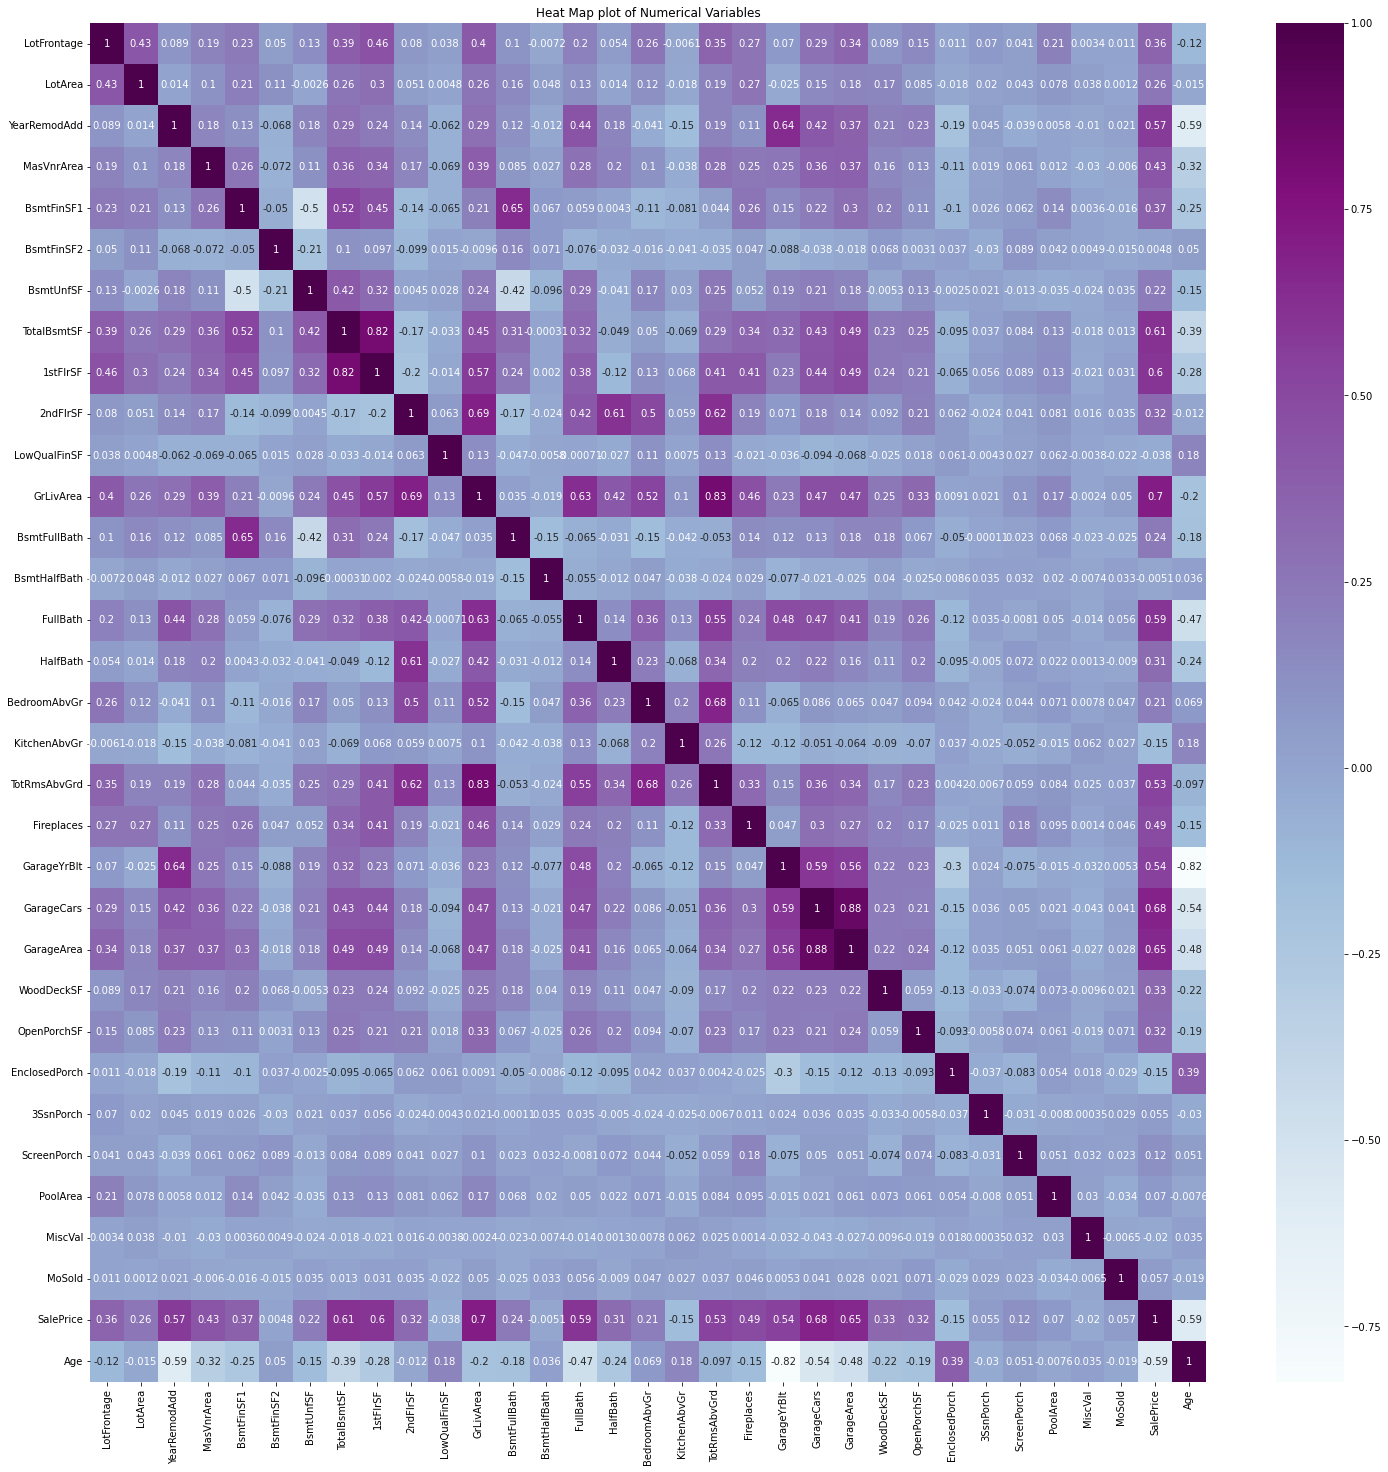

In [32]:
plt.figure(figsize=[25,25])
sns.heatmap(housing.corr(),annot=True,cmap='BuPu')
plt.title("Heat Map plot of Numerical Variables")
plt.show()

#### Few variables like GrLivArea,GarageCars,GarageArea,TotalBsmtSF are correalated to target variable SalePrice with coeff above 0.60

### Get the Top 10 Correlated Columns

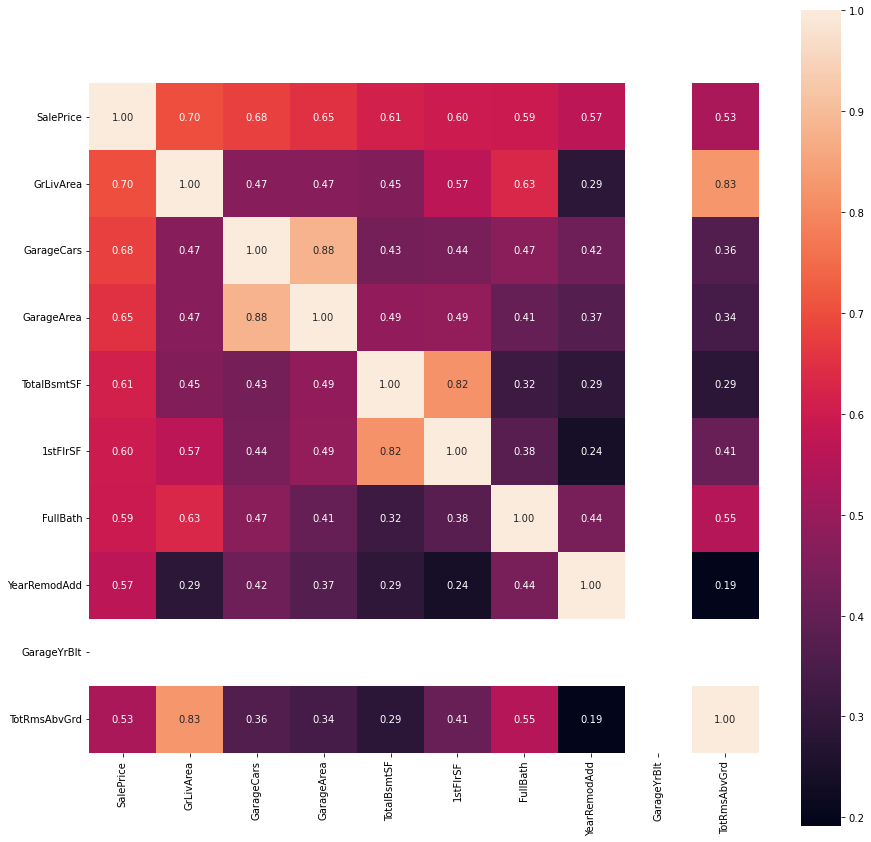

In [33]:
k=10
plt.figure(figsize=[15,15])
cols = housing.corr().nlargest(k,"SalePrice")["SalePrice"].index
cm = np.corrcoef(housing[cols].values.T)
sns.heatmap(cm,annot=True,square=True,fmt=".2f",cbar=True,annot_kws={"size":10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

#### We can see that 
- GarageArea and GarageCars are highly correlated with coeff of 0.88 
- GrLivArea and TotRmsAbvGrd are highly correlated with coeff of 0.83
- TotalBsmtSF and FirstFlrSF are highly correlated with coeff of 0.82

### Pairplot for Numerical columns

<Figure size 1440x1440 with 0 Axes>

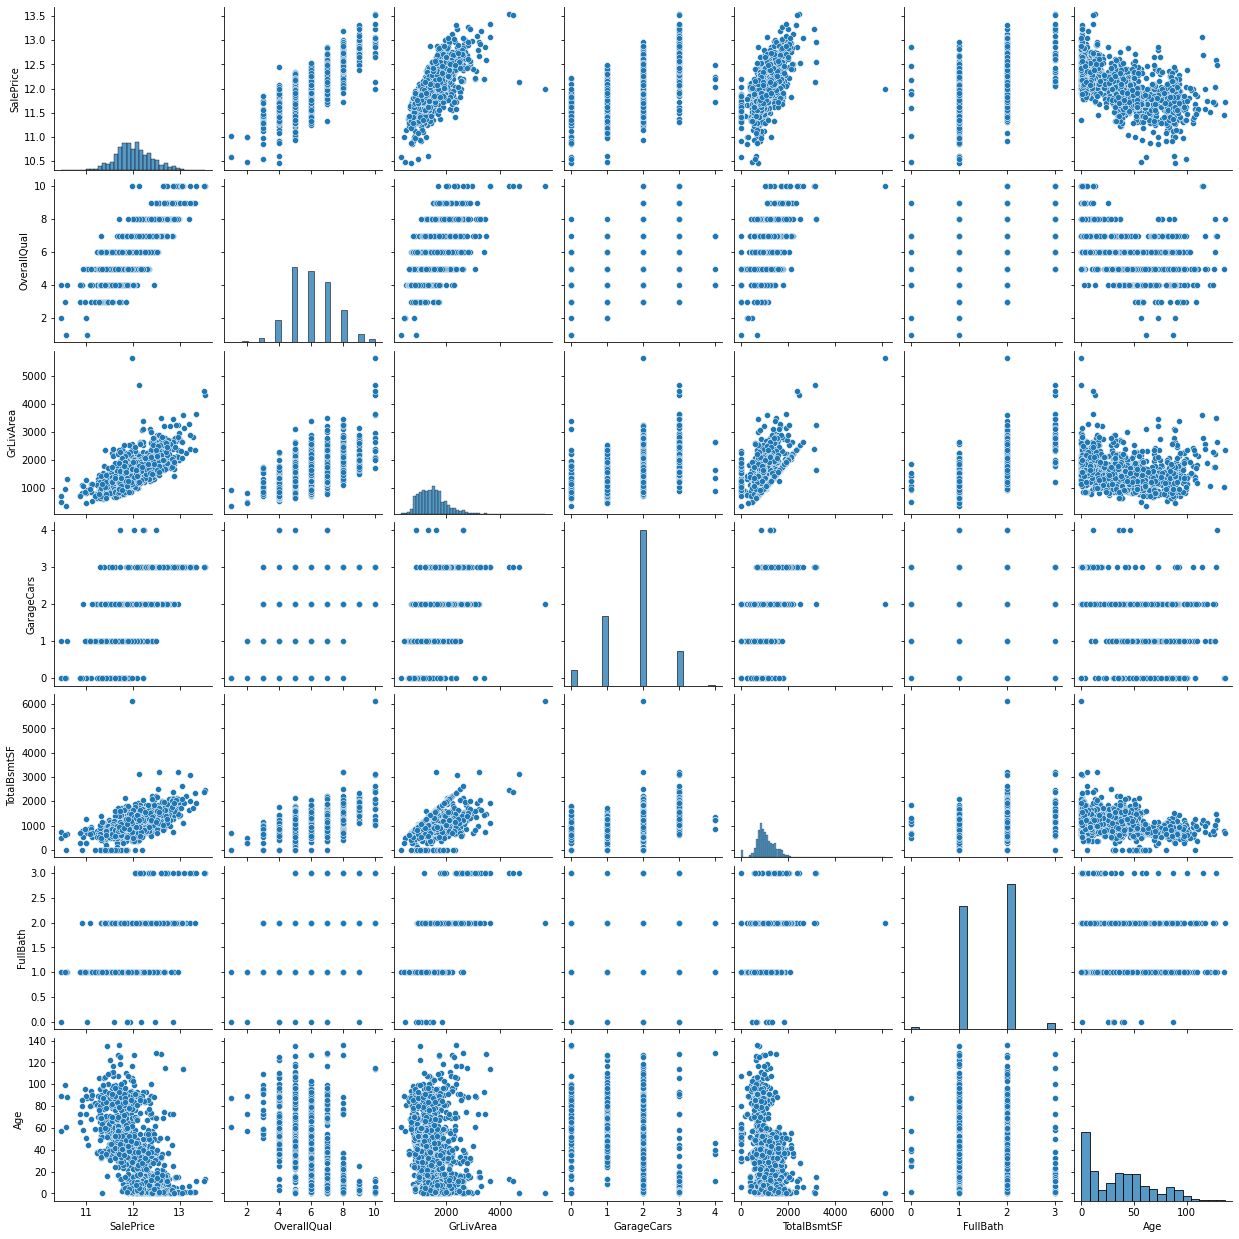

In [34]:
cols = ["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","Age"]
plt.figure(figsize=[20,20])
sns.pairplot(housing[cols])
plt.show()

#### We can see that Age has negative correlation with target variable SalePrice and TotalBsmtSF and GrLivArea have positive correlation with SalePrice

### Imputing Missing Values

In [35]:
null_cols = housing.columns[housing.isnull().any()]
null_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [36]:
for i in null_cols:
    if housing[i].dtype == np.float64 or housing[i].dtypes == np.int64:
        print(i,housing[i].median())
        housing[i].fillna(housing[i].mean(),inplace=True)
    else:
        print(i,housing[i].mode())
        housing[i].fillna(housing[i].mode()[0],inplace=True)

LotFrontage 69.0
MasVnrType 0    None
dtype: object
MasVnrArea 0.0
Electrical 0    SBrkr
dtype: object
GarageYrBlt 1980.0


In [37]:
#Check if null values are present
housing.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

#### All the null values are handled, so we can proceed further with Dummy encoding

### Dummy encoding

In [38]:
house_num = housing.select_dtypes(include=['int64', 'float64'])
house_cat = housing.select_dtypes(include='object')

In [39]:
house_cat_dm= pd.get_dummies(house_cat, drop_first=True)
house_cat_dm.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD

In [40]:
house = pd.concat([house_num, house_cat_dm], axis=1)#Concat the encoded dataframe with numerical dataframe

In [41]:
house.shape #Chech the shape

(1460, 287)

In [42]:
house.head() #Chech the top 5 values

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_

### Train-Test Split

In [43]:
#Extract the y value
y = house["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [44]:
#Extract the X value
X = house.drop(["SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageC

In [45]:
#Split into train and test with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [46]:
#Get the shape of X and y for train dataset
print(X_train.shape)
print(y_train.shape)

(1021, 286)
(1021,)


### Building a function to calculate evaluation metrics

In [59]:
# Creating a function for evaluating the metrics 
def eval_metrics(y_train, y_train_pred, y_test, y_pred):
    
    ## R-squared values of train and test data
    print("r2 score(Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    print("r2 score(Test) =", '%.2f' % r2_score(y_test, y_pred))

    # Root Mean Squared Error for train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_train = mse_train**0.5
    rmse_test = mse_test**0.5
    print("RMSE(Train) =", '%.2f' % rmse_train) 
    print("RMSE(Test) =", '%.2f' % rmse_test)

### Scaling the dataset with standard scalar

In [48]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

In [49]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Building first model using Ridge Regression

In [50]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'
params = {'alpha': 
          [0.0001,0.001 ,0.01 ,0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0 
           ,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,20,50,100,500,1000]}

ridge = Ridge()
# cross validation
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 9.0}

#### We can see the optimal value of alpha for ridge regression in 9

In [53]:
# View the cross validation result
ridgeCV.cv_results_

{'mean_fit_time': array([0.07075515, 0.06375847, 0.10353332, 0.05576262, 0.04237328,
        0.03618026, 0.03241243, 0.04337296, 0.07634954, 0.06195993,
        0.06435785, 0.0643599 , 0.06336007, 0.06535792, 0.06236234,
        0.06555691, 0.06435676, 0.07334995, 0.07935014, 0.07655139,
        0.07715173, 0.07095299, 0.05896106, 0.06715598, 0.06655817,
        0.06735849, 0.06515994, 0.06216025]),
 'std_fit_time': array([0.00627026, 0.00667077, 0.04997133, 0.01080791, 0.00874869,
        0.00607223, 0.00101208, 0.00982314, 0.01397095, 0.00399696,
        0.00491839, 0.00531178, 0.00300383, 0.00567509, 0.00564019,
        0.00449672, 0.00854028, 0.00778443, 0.01055037, 0.02294298,
        0.01206626, 0.0062879 , 0.00244587, 0.00856175, 0.00636961,
        0.00611479, 0.00678946, 0.0029937 ]),
 'mean_score_time': array([0.01279197, 0.01519113, 0.01499214, 0.01399074, 0.00799375,
        0.00679669, 0.00619454, 0.01079259, 0.01299357, 0.01319222,
        0.01199193, 0.01199226, 0.013790

In [54]:
#Building model with alpha as 9.0
ridge = Ridge(alpha=9)

In [55]:
ridge.fit(X_train, y_train)# fit the model

Ridge(alpha=9)

In [56]:
ridge.coef_ #view the coefficients

array([-9.13451837e-03,  1.68853825e-02,  2.65925082e-02,  6.12352498e-04,
       -5.06705246e-03,  8.87770453e-03,  8.64363662e-04, -1.34663917e-03,
        2.96812575e-02,  4.53509609e-02,  7.39330025e-03,  6.00982529e-02,
        2.29108248e-02,  1.54250943e-03,  2.39117630e-02,  1.80162753e-02,
        8.95499220e-03, -1.99847242e-02,  2.60005245e-02,  1.72884478e-02,
       -7.78542724e-03,  4.48820876e-02,  6.28489973e-03,  1.36930988e-02,
       -1.75065657e-03,  1.06401249e-02,  8.30098323e-03,  1.69773701e-02,
       -4.87916566e-03, -3.21536870e-03,  5.27138348e-03, -5.59999082e-02,
       -7.60906309e-02,  1.13241526e-02,  3.85253866e-03,  6.26484199e-03,
       -2.68334112e-02,  4.53941841e-02,  2.08127167e-02, -4.59932462e-03,
        6.68481264e-03, -1.82161753e-03, -2.03756474e-02, -8.01026561e-02,
       -2.24753113e-02,  2.28529155e-03,  4.58687777e-02,  1.12251043e-02,
        3.58836423e-02, -1.22192889e-02,  1.10385455e-02, -1.84134878e-02,
        4.39778632e-02,  

In [57]:
# Make predictions on test and train datasets
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [60]:
eval_metrics(y_train, y_train_pred, y_test, y_pred) # Evaluate r2 score and RMSE on train and test

r2 score(Train) = 0.92
r2 score(Test) = 0.89
RMSE(Train) = 0.11
RMSE(Test) = 0.14


#### We can see that r2 score is 0.92, 0.89 and Root mean squared error is 0.11, 0.14 for Train, Test

In [61]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_) #Add the results to a dataframe
ridgeCV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070755,0.006270,0.012792,0.001165,0.0001,{'alpha': 0.0001},-0.087072,-0.118242,-0.108027,-0.092898,-0.102857,-0.101819,0.011013,24,-0.059707,-0.052485,-0.052702,-0.057455,-0.058933,-0.056256,0.003078
1,0.063758,0.006671,0.015191,0.003427,0.001,{'alpha': 0.001},-0.087158,-0.120938,-0.107478,-0.093360,-0.102341,-0.102255,0.011691,26,-0.059792,-0.052561,-0.052844,-0.057564,-0.058982,-0.056348,0.003063
2,0.103533,0.049971,0.014992,0.002681,0.01,{'alpha': 0.01},-0.088058,-0.122833,-0.105270,-0.093099,-0.098857,-0.101623,0.012062,23,-0.060535,-0.052697,-0.053647,-0.058306,-0.059460,-0.056929,0.003162
3,0.055763,0.010808,0.013991,0.005510,0.05,{'alpha': 0.05},-0.089761,-0.121531,-0.102480,-0.093090,-0.094047,-0.100182,0.011468,22,-0.062708,-0.052985,-0.056390,-0.060640,-0.061041,-0.058753,0.003558
4,0.042373,0.008749,0.007994,0.001672,0.1,{'alpha': 0.1},-0.090749,-0.119892,-0.103079,-0.093695,-0.092460,-0.099975,0.010838,21,-0.064304,-0.053262,-0.058519,-0.062445,-0.062300,-0.060166,0.003931


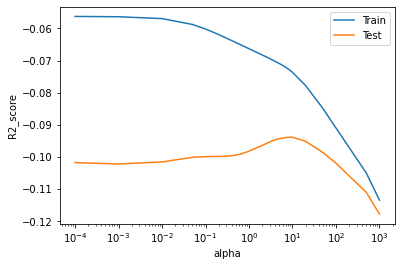

In [62]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### We can the gradual descent in the graph at 9 which is the optimal value of alpha Ridge regression

### Building second model using Lasso Regression

In [63]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'
params = {'alpha': 
          [0.001 ,0.01 ,0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0 
           ,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,20,50,100,500,1000]}

lasso = Lasso()
# cross validation
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
lassoCV.best_params_ #Choose best value of alpha

{'alpha': 0.001}

In [65]:
#Buildig model with alpha as 0.001
lasso = Lasso(alpha=0.001)

In [66]:
lasso.fit(X_train, y_train) #fit the model

Lasso(alpha=0.001)

In [67]:
lasso.coef_ #view the coefficients

array([-9.85423047e-03,  1.52342830e-02,  3.44771277e-02, -0.00000000e+00,
       -0.00000000e+00,  3.88649944e-03,  3.17620918e-03,  3.49315438e-03,
        0.00000000e+00,  1.27456239e-03,  2.59505117e-04,  1.10330379e-01,
        2.46727137e-02,  1.95037122e-03,  2.20072036e-02,  1.41756482e-02,
        3.72174487e-03, -2.58470953e-02,  2.69717884e-02,  2.25420546e-02,
       -7.09532350e-03,  5.56306502e-02,  4.71249767e-03,  1.34759503e-02,
       -0.00000000e+00,  8.86996757e-03,  7.15821090e-03,  1.85148371e-02,
       -8.96247750e-03, -3.89710411e-03,  3.98273204e-03, -5.01638555e-02,
       -7.22161090e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.23809275e-02,  5.01658634e-04,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -7.39577167e-02,
       -0.00000000e+00,  0.00000000e+00,  2.01580591e-03, -0.00000000e+00,
        3.97524668e-04, -4.56777782e-02,  0.00000000e+00, -0.00000000e+00,
        2.54195552e-02,  

In [68]:
## Make predictions on train and test
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [69]:
eval_metrics(y_train, y_train_pred, y_test, y_pred) # Evaluate r2 score and rmse

r2 score(Train) = 0.90
r2 score(Test) = 0.88
RMSE(Train) = 0.12
RMSE(Test) = 0.14


#### We can see that r2 score is 0.90, 0.88 and Root mean squared error is 0.12, 0.14 for Train, Test

In [70]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_) #Add the results to a dataframe
lassoCV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.201272,0.031731,0.014789,0.001167,0.001,{'alpha': 0.001},-0.090084,-0.112990,-0.095126,-0.086857,-0.088112,-0.094634,0.009601,1,-0.083576,-0.069130,-0.081009,-0.082246,-0.079898,-0.079172,0.005169
1,0.057565,0.004756,0.015189,0.002785,0.01,{'alpha': 0.01},-0.112825,-0.139696,-0.123536,-0.115654,-0.115880,-0.121518,0.009760,2,-0.116684,-0.101871,-0.115147,-0.120099,-0.117170,-0.114194,0.006367
2,0.054167,0.009841,0.021585,0.012510,0.05,{'alpha': 0.05},-0.133704,-0.152416,-0.157842,-0.135358,-0.121187,-0.140101,0.013323,3,-0.141654,-0.121347,-0.139399,-0.140624,-0.142489,-0.137103,0.007945
3,0.053966,0.007716,0.014190,0.001325,0.1,{'alpha': 0.1},-0.166291,-0.180534,-0.201522,-0.164440,-0.151498,-0.172857,0.017034,4,-0.175146,-0.158215,-0.173403,-0.172983,-0.173649,-0.170679,0.006275
4,0.054167,0.011188,0.018589,0.004315,0.2,{'alpha': 0.2},-0.256055,-0.259795,-0.292489,-0.244383,-0.232141,-0.256973,0.020225,5,-0.261011,-0.250460,-0.255354,-0.255525,-0.257831,-0.256036,0.003458


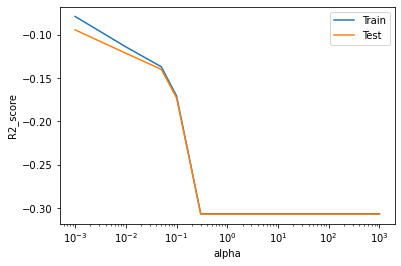

In [71]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### We can the gradual descent in the graph at 0.001 which is the optimal value of alpha for lasso regression

### Comparision Between Ridge and Lasso Models

- `Ridge` -> r2 score is `0.92(Train), 0.89(Test)` and Root mean squared error is `0.11(Train), 0.14(Test)` and optimal alpha is `9` 
- `Lasso` -> r2 score is `0.90(Train), 0.88(Test)` and Root mean squared error is `0.12(Train), 0.14(Test)` and optimal alpha is `0.001`

#### Therefore we can see a reduction in r2 score on lasso model compared to ridge model

### Feature Extarction/Elimination

In [73]:
betas = pd.DataFrame(index=X.columns) # Convert the columns to a dataframe as betas
betas.rows = X.columns
# Creating columns for Ridge and lasso coefficients against each feature
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
LotFrontage,-0.009135,-9.854230e-03
LotArea,0.016885,1.523428e-02
YearRemodAdd,0.026593,3.447713e-02
MasVnrArea,0.000612,-0.000000e+00
BsmtFinSF1,-0.005067,-0.000000e+00
BsmtFinSF2,0.008878,3.886499e-03
BsmtUnfSF,0.000864,3.176209e-03
TotalBsmtSF,-0.001347,3.493154e-03
1stFlrSF,0.029681,0.000000e+00
2ndFlrSF,0.045351,1.274562e-03


In [83]:
# View the features removed by Lasso
lasso_cols_removed = list(betas[betas['Lasso']==0].index)
print(lasso_cols_removed)

['MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'OpenPorchSF', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RH', 'Street_Pave', 'Alley_None', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition

In [84]:
# View the features selected by Lasso
lasso_cols_selected = list(betas[betas['Lasso']!=0].index)
print(lasso_cols_selected)

['LotFrontage', 'LotArea', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age', 'MSSubClass_30', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Pave', 'LotShape_IR2', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2Story', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'Ove

In [85]:
print(len(lasso_cols_removed))# 179 features are removed by lasso
print(len(lasso_cols_selected))# 107 features are selected by lasso

179
107


### Some Top features are below

#### Top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [86]:
# View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.124367
Neighborhood_StoneBr    0.092893
OverallQual_8           0.084311
Neighborhood_Crawfor    0.083348
Exterior1st_BrkFace     0.082854
Neighborhood_NridgHt    0.080316
LandContour_HLS         0.071751
CentralAir_Y            0.069949
OverallCond_9           0.069840
BsmtCond_TA             0.066628
Name: Ridge, dtype: float64

In [87]:
# We have to take inverse log of betas to interpret the ridge coefficients in terms of target variable
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.132432
Neighborhood_StoneBr    1.097345
OverallQual_8           1.087967
Neighborhood_Crawfor    1.086920
Exterior1st_BrkFace     1.086383
Neighborhood_NridgHt    1.083629
LandContour_HLS         1.074388
CentralAir_Y            1.072454
OverallCond_9           1.072337
BsmtCond_TA             1.068898
Name: Ridge, dtype: float64

In [88]:
# View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.177362
GrLivArea               0.110330
OverallQual_8           0.098171
Neighborhood_Crawfor    0.098142
Neighborhood_StoneBr    0.087346
Neighborhood_NridgHt    0.086622
Exterior1st_BrkFace     0.083240
CentralAir_Y            0.078043
Functional_Typ          0.071565
BsmtCond_TA             0.071492
Name: Lasso, dtype: float64

In [89]:
# We have to take inverse log of betas to interpret the ridge coefficients in terms of target variable
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.194063
GrLivArea               1.116647
OverallQual_8           1.103152
Neighborhood_Crawfor    1.103120
Neighborhood_StoneBr    1.091274
Neighborhood_NridgHt    1.090484
Exterior1st_BrkFace     1.086803
CentralAir_Y            1.081169
Functional_Typ          1.074188
BsmtCond_TA             1.074110
Name: Lasso, dtype: float64

### Conclusion :

Below are the Top 10 features with corresponding coefficients according to Ridge model

- OverallQual_9           ,1.132432
- Neighborhood_StoneBr    ,1.097345
- OverallQual_8           ,1.087967
- Neighborhood_Crawfor    ,1.086920
- Exterior1st_BrkFace     ,1.086383
- Neighborhood_NridgHt    ,1.083629
- LandContour_HLS         ,1.074388
- CentralAir_Y            ,1.072454
- OverallCond_9           ,1.072337
- BsmtCond_TA             ,1.068898

Below are the Top 10 features with corresponding coefficients according to lasso model

- OverallQual_9           ,1.194063
- GrLivArea               ,1.116647
- OverallQual_8           ,1.103152
- Neighborhood_Crawfor    ,1.103120
- Neighborhood_StoneBr    ,1.091274
- Neighborhood_NridgHt    ,1.090484
- Exterior1st_BrkFace     ,1.086803
- CentralAir_Y            ,1.081169
- Functional_Typ          ,1.074188
- BsmtCond_TA             ,1.074110

Few Inferences are :
- Therefore the price of the house will increase by 1.11 with the increase in GrLivArea
- The price of house can increase by 1.08 times if the finish of the house is Very Good
- If the house has centralized AC the price can increase by 1.08 times
- If the basement condition is typical then the house price may increase upto 1.06 times
- The price of the house may increase if the neighborhood has Crawford,Stone Brook and Northridge Heights as Physical locations within Ames city limits

##### Optimal value of lambda for Ridge Regression = 9
##### Optimal value of lambda for Lasso = 0.001

### Answering the Subjective Questions

#### Building Regression model using Ridge and Lasso with double the alpha value

In [90]:
# Let us build the ridge regression model with double value of alpha i.e. 18
ridge = Ridge(alpha=18)
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=18)

In [91]:
# Make predictions on test and train
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [92]:
eval_metrics(y_train, y_train_pred, y_test, y_pred)

r2 score(Train) = 0.91
r2 score(Test) = 0.89
RMSE(Train) = 0.12
RMSE(Test) = 0.14


In [93]:
# Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [94]:
# Make predictions on Test and Train
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [95]:
eval_metrics(y_train, y_train_pred, y_test, y_pred)

r2 score(Train) = 0.88
r2 score(Test) = 0.87
RMSE(Train) = 0.13
RMSE(Test) = 0.15


###  Changes in Ridge Regression metrics:
- R2 score of train set decreased from 0.92 to 0.91
- R2 score of test set remained same at 0.89

###  Changes in Lasso metrics:
- R2 score of train set decreased from 0.90 to 0.88
- R2 score of test set decreased from 0.88 to 0.87

### Let us evaluate the changes in features and coefficients after changing value of alpha

In [97]:
#create a datafame with all the independent variables
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
# Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
LotFrontage,-0.008980,-0.004678
LotArea,0.016159,0.013752
YearRemodAdd,0.030513,0.039798
MasVnrArea,0.001720,0.000000
BsmtFinSF1,-0.002491,0.000000
BsmtFinSF2,0.008144,0.000000
BsmtUnfSF,0.002343,0.000000
TotalBsmtSF,0.002525,0.019556
1stFlrSF,0.029898,0.002864
2ndFlrSF,0.043516,0.000000


#### Lets see the most important predictor variables after the changes in alpha

In [98]:
# View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.100579
OverallQual_8           0.072579
Neighborhood_Crawfor    0.070991
Neighborhood_StoneBr    0.067993
Exterior1st_BrkFace     0.067506
Neighborhood_NridgHt    0.065890
CentralAir_Y            0.063980
Functional_Typ          0.061777
GrLivArea               0.058594
BsmtCond_TA             0.057127
Name: Ridge, dtype: float64

In [99]:
# We have to take inverse log of betas to interpret the ridge coefficients in terms of target variable
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.105811
OverallQual_8           1.075278
Neighborhood_Crawfor    1.073572
Neighborhood_StoneBr    1.070357
Exterior1st_BrkFace     1.069836
Neighborhood_NridgHt    1.068109
CentralAir_Y            1.066071
Functional_Typ          1.063725
GrLivArea               1.060345
BsmtCond_TA             1.058790
Name: Ridge, dtype: float64

In [100]:
# View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.162088
GrLivArea               0.105660
OverallQual_8           0.095066
Neighborhood_Crawfor    0.074932
CentralAir_Y            0.073035
Functional_Typ          0.068363
GarageCars              0.063891
Exterior1st_BrkFace     0.048369
Neighborhood_NridgHt    0.044968
Condition1_Norm         0.044567
Name: Lasso, dtype: float64

In [101]:
# We have to take inverse log of betas to interpret the lasso coefficients in terms of target variable
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.175964
GrLivArea               1.111444
OverallQual_8           1.099732
Neighborhood_Crawfor    1.077811
CentralAir_Y            1.075768
Functional_Typ          1.070754
GarageCars              1.065976
Exterior1st_BrkFace     1.049558
Neighborhood_NridgHt    1.045994
Condition1_Norm         1.045575
Name: Lasso, dtype: float64

### So, the most important predictor variables after we double the alpha values are

Ridge :
- OverallQual_9           
- OverallQual_8           
- Neighborhood_Crawfor    
- Neighborhood_StoneBr    
- Exterior1st_BrkFace     
- Neighborhood_NridgHt   
- CentralAir_Y            
- Functional_Typ        
- GrLivArea               
- BsmtCond_TA                  

Lasso:
- OverallQual_9           
- GrLivArea             
- OverallQual_8          
- Neighborhood_Crawfor 
- CentralAir_Y            
- Functional_Typ          
- GarageCars              
- Exterior1st_BrkFace   
- Neighborhood_NridgHt    
- Condition1_Norm         




### Remove top 5 features

In [102]:
# Create a list of top 5 lasso predictors
top5_features = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'CentralAir_Y']

In [103]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5_features, axis=1)
X_test_dropped = X_test.drop(top5_features, axis=1)

In [104]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

### #Therefore optimul value of alpha is 0.001

In [106]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [107]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [108]:
## Make predictions on Train and Test
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [109]:
eval_metrics(y_train, y_train_pred, y_test, y_pred)

r2 score(Train) = 0.90
r2 score(Test) = 0.88
RMSE(Train) = 0.13
RMSE(Test) = 0.14


#### We can set the top 5 features now

In [110]:
#create a datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas['Lasso'] = lasso.coef_
betas

,Lasso
LotFrontage,-1.200680e-02
LotArea,1.383921e-02
YearRemodAdd,3.841114e-02
MasVnrArea,1.894218e-04
BsmtFinSF1,-0.000000e+00
BsmtFinSF2,2.705218e-03
BsmtUnfSF,3.050525e-03
TotalBsmtSF,6.317718e-03
1stFlrSF,7.689444e-02
2ndFlrSF,9.319360e-02


#### We can see the top 5 significant features in predicting the value of a house according to the new lasso model

In [111]:
# View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

Neighborhood_StoneBr    0.120437
Neighborhood_NridgHt    0.108747
Exterior1st_BrkFace     0.106814
2ndFlrSF                0.093194
BsmtCond_TA             0.085863
Name: Lasso, dtype: float64

###  After dropping our top 5 lasso predictors, we get the below new top 5 predictors and coefficients

- Neighborhood_StoneBr    ,0.120437
- Neighborhood_NridgHt    ,0.108747
- Exterior1st_BrkFace     ,0.106814
- 2ndFlrSF                ,0.093194
- BsmtCond_TA             ,0.085863